In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, display_markdown

SEED = 0

Matplotlib is building the font cache; this may take a moment.


## Load dataset

In [2]:
df = pd.read_csv('../diabetes_prediction_dataset.csv')

In [3]:
df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


## Perform cleaning and preprocessing

### Detect and remove invalid values

In [4]:
# Make a dataframe to count the null, na, and negative values
invalid_values = pd.DataFrame()
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
      invalid_values[col] = [df[col].isnull().sum(), df[col].isna().sum(), (df[col] < 0).sum()]
    else:
      invalid_values[col] = [df[col].isnull().sum(), df[col].isna().sum(), np.NaN]
invalid_values.index = ['Null count', 'NaN count', 'Negative count']

display(invalid_values)
print('There are no null, NaN, or negative values in the dataset that need cleaning.\n')

print(f'Duplicated Rows: {df.duplicated().sum()}')
# There are 3854 duplicate rows, let's drop them
df_clean = df.drop_duplicates()

# There are 3998 "ever" values in the 'smoking_history' column, this looks like a typo
# So let's replace it with 'never'
print(f'''
There are {len(df_clean[df_clean['smoking_history'] == 'ever'])} "ever" values in the smoking_history column.
This looks like a typo, so we will replace it with "never".
''')
df_clean.loc[df_clean['smoking_history'] == 'ever', 'smoking_history'] = 'never'

print(f'There are {len(df_clean)} clean rows left after dropping duplicates.')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
Null count,0.0,0,0,0,0.0,0,0,0,0
NaN count,0.0,0,0,0,0.0,0,0,0,0
Negative count,NaN,0,0,0,NaN,0,0,0,0


There are no null, NaN, or negative values in the dataset that need cleaning.

Duplicated Rows: 3854

There are 3998 "ever" values in the smoking_history column.
This looks like a typo, so we will replace it with "never".

There are 96146 clean rows left after dropping duplicates.


### Preprocess data into numerical and categorical features

In [5]:
categorical_columns = set(['diabetes', 'heart_disease', 'hypertension', 'gender', 'smoking_history'])
df_quantitative_columns = set(df_clean.columns).difference(set(categorical_columns))
df_quantitative = df_clean[list(df_quantitative_columns)]
df_categorical = df_clean[list(categorical_columns)]

## Perform exploratory data analysis

### Descriptive statistics

In [6]:
# Creating a dictionary to store the labeled dataframes
categorical_summary_dfs = {col: pd.concat([
    df_categorical[col].value_counts(normalize=True),
    df_categorical[col].value_counts()
], axis=1, keys=['proportion', 'count']) for col in df_categorical}

# Concatenating along axis=0 with keys as column labels
categorical_summary_df = pd.concat(categorical_summary_dfs, axis=0)

# Displaying the dataframe
display(categorical_summary_df)


proportion  count
hypertension    0              0.922399  88685
                1              0.077601   7461
diabetes        0              0.911780  87664
                1              0.088220   8482
gender          Female         0.584122  56161
                Male           0.415691  39967
                Other          0.000187     18
smoking_history never          0.399351  38396
                No Info        0.342053  32887
                former         0.096717   9299
                current        0.095657   9197
                not current    0.066222   6367
heart_disease   0              0.959197  92223
                1              0.040803   3923

In [7]:
display_markdown(f'''This dataset contains {len(df_clean)} rows and {len(df_clean.columns)} columns.

The majority of subjects in this dataset are non-diabetic.  
{categorical_summary_df['count']['diabetes'][0]} non-diabetic subjects  
{categorical_summary_df['count']['diabetes'][1]} diabetic subjects  
{categorical_summary_df['proportion']['diabetes'][1] * 100:.2f}% diabetic proportion  

{categorical_summary_df['proportion']['hypertension'][1] * 100:.2f}% of subjects have hypertension  
{categorical_summary_df['proportion']['heart_disease'][1] * 100:.2f}% of subjects have heart disease  

TODO: Descrive the smoking history column.

This sample has a balanced number of male and female subjects. {categorical_summary_df['proportion']['gender']['Male'] * 100:.2f}% of subjects are male.''', raw=True)

This dataset contains 96146 rows and 9 columns.

The majority of subjects in this dataset are non-diabetic.  
87664 non-diabetic subjects  
8482 diabetic subjects  
8.82% diabetic proportion  

7.76% of subjects have hypertension  
4.08% of subjects have heart disease  

TODO: Descrive the smoking history column.

This sample has a balanced number of male and female subjects. 41.57% of subjects are male.

#### 5-number summary of dataset's quantitative features

In [8]:
df_summary = df_quantitative.describe()
df_summary.drop(labels=['count'], inplace=True)
display(df_summary)

,blood_glucose_level,bmi,HbA1c_level,age
mean,138.218231,27.321461,5.532609,41.794326
std,40.909771,6.767716,1.073232,22.462948
min,80.000000,10.010000,3.500000,0.080000
25%,100.000000,23.400000,4.800000,24.000000
50%,140.000000,27.320000,5.800000,43.000000
75%,159.000000,29.860000,6.200000,59.000000
max,300.000000,95.690000,9.000000,80.000000


HbA1c Level: The average is 5.53, with a standard deviation of 1.07. The range spans from 3.5 to 9.0, showing substantial variability.  

BMI: The mean BMI is 27.32, with a large standard deviation of 6.77. The minimum is 10.01 and the maximum is 95.69, suggesting a large number of outliers.  

Age: With a mean of 41.79 and a standard deviation of 22.46, this sample has a lot of age diversity. The youngest subject is 0.08 years old, and the oldest is 80 years. Little or no outliers are expected in this feature.  

Blood Glucose Level: The mean level is 138.22, with a standard deviation of 40.91. The minimum is 80 and the maximum is 300. Values over 160 are considered hyperglycemic.

#### 5-number summary of non-diabetic quantitative features

In [9]:
df_nondiabetic_summary = df_clean[df_clean['diabetes'] == 0][list(df_quantitative_columns)].describe()
display(df_nondiabetic_summary)

,blood_glucose_level,bmi,HbA1c_level,age
count,87664.000000,87664.000000,87664.000000,87664.000000
mean,132.818489,26.869003,5.396936,39.943229
std,34.241382,6.509884,0.970833,22.228281
min,80.000000,10.010000,3.500000,0.080000
25%,100.000000,23.000000,4.800000,22.000000
50%,140.000000,27.320000,5.800000,40.000000
75%,158.000000,29.180000,6.200000,57.000000
max,200.000000,95.690000,6.600000,80.000000


#### 5-number summary of diabetic quantitative features

In [10]:
df_diabetic_summary = df_clean[df_clean['diabetes'] == 1][list(df_quantitative_columns)].describe()
display(df_diabetic_summary)

,blood_glucose_level,bmi,HbA1c_level,age
count,8482.000000,8482.000000,8482.000000,8482.000000
mean,194.026173,31.997755,6.934827,60.925961
std,58.630047,7.563494,1.076462,14.545301
min,126.000000,10.980000,5.700000,3.000000
25%,145.000000,27.320000,6.100000,52.000000
50%,160.000000,29.985000,6.600000,62.000000
75%,240.000000,35.940000,7.500000,72.000000
max,300.000000,88.720000,9.000000,80.000000


All sample statistics of HbA1c for diabetic subjects is are higher than non-diabetic subjects. This may indicate that diabetic subjects have higher HbA1c levels on average.

Similarly, all sample statistics for blood glucose levels are higher for diabetic subjects than non-diabetic subjects, suggesting that diabetic subjects have higher blood glucose levels on average. 50% of diabetic subjects have blood glucose levels over 160, which is considered hyperglycemic, while fewer than 75% of non-diabetic subjects have blood glucose levels over 160.

Nearly all statistics, with the exception of the maximum, are higher for bmi in diabetic subjects compared to non-diabetic subjects. This suggests that diabetic subjects tend to have higher BMI values on average.

The average age of diabetic subjects is higher than non-diabetic subjects, and the standard deviation is smaller, indicating that subjects with diabetes may be older and closer in age than non-diabetic subjects.

In [11]:
print(f'''The dataset contains {len(df_clean)} rows and {len(df_clean.columns)} columns.

The quantitative columns are: {list(df_quantitative_columns)}.

The dataset has 
''')

The dataset contains 96146 rows and 9 columns.

The quantitative columns are: ['blood_glucose_level', 'bmi', 'HbA1c_level', 'age'].

The dataset has 



### Discriptive statistics visualizations

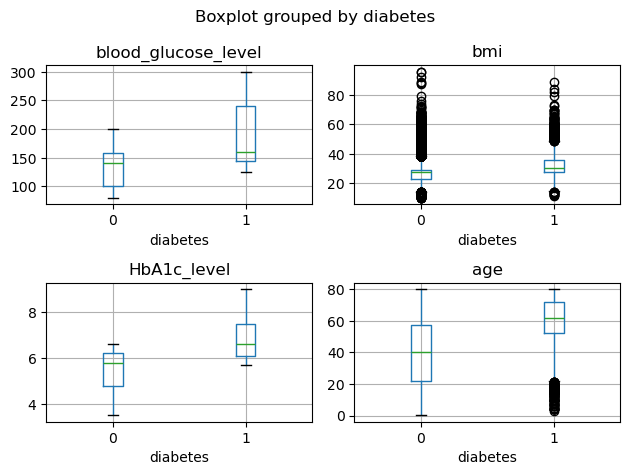

In [12]:
n_number_columns = len(df_quantitative_columns)
_, axes = plt.subplots(n_number_columns//2, n_number_columns//2)
# flatten the axes for easier indexing
axes_flat = axes.flatten()

for i, col in enumerate(df_quantitative_columns):
  df_clean.boxplot(column=col, by='diabetes', ax=axes_flat[i])

if len(axes_flat) > n_number_columns:
  axes_flat[len(axes_flat) - 1].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
#test